In [19]:
from scipy.constants import c, m_e, eV, e
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/77789533/using-solve-ivp-to-find-the-ground-state-energy-of-an-electron

$$\psi '' = - 2 \cdot m_e \cdot (E - V(x)) \cdot \psi$$

In [20]:
me_ev = m_e * c**2 / e        # mass m_e in [eV]
l_bohr = 5.2918e-11           # Bohr radius [m]
convert_length = 5067730.179  # convert [m] to [1/eV] in natural units
l_ev = l_bohr * convert_length
V0 = 50
a = 10e-11 * convert_length

def V(x):
    return V0 * ((x / a) ** 2)

def eqn2(x, y, energy):
    psi, v = y
    dpsidx = v
    dvdx = -2 * me_ev * psi * (energy - V(x))
    return dpsidx, dvdx

def solve2(energy):
    y0 = [0, 1]
    sol = integrate.solve_ivp(
        eqn2,
        [-10 * a, 10 * a],
        y0,
        t_eval=np.linspace(-10 * a, 10 * a, 1000),
        args=(energy,),
        dense_output=True,
    )
    psi_L = sol.sol(10 * a)[0]
    return sol

s = solve2(138.0214281)

In [27]:
def V(x):
    return V0 * np.power((x / a), 2)

def system(x, y, energy):
    return np.array([
        y[1],
        -2 * me_ev * y[0] * (energy - V(x))
    ])

In [51]:
x = np.linspace(-10 * a, 10 * a, 2000)
sol = integrate.solve_ivp(
    system,
    [x.min(), x.max()],
    [0, 1],
    t_eval=x,
    args=(1000000.0214281,),
    dense_output=True,
)

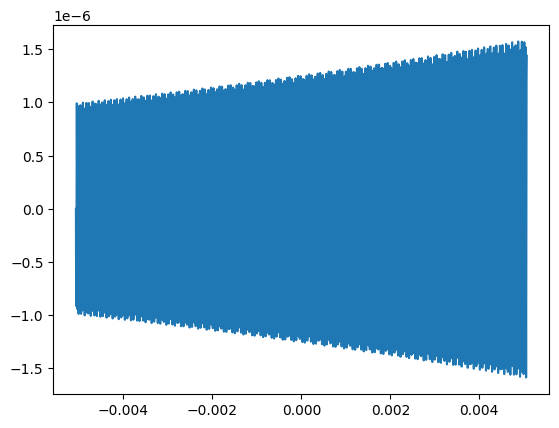

In [52]:
fig, axe = plt.subplots()
axe.plot(sol.t, sol.y[0,:])